In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as random

from scipy.linalg import svdvals
from sklearn.preprocessing import normalize

In [ ]:
def minSV(A,x,q,beta):
    m_in = A.shape[0]
    inner_p = [0]*m_in
    for i in range(m_in):
        inner_p[i] = [np.inner(x.T,A[i]).item(0)**2,i]
    df_inner = pd.DataFrame(inner_p)
    df_asc = df_inner.sort_values(by=[0])
    df_min = df_asc.iloc[:int(m_in*(q-beta))]
    min_arr = np.array(df_min[1])
    A_df = pd.DataFrame(A).loc[min_arr]
    A_S = np.asmatrix(A_df)
    return (np.linalg.norm(A_S*x))/(np.linalg.norm(x))

In [ ]:
def minSV2(A,q,beta):
    min_sv = A.shape[0] #initialize to something that will be greater than any singular value
    for i in range(100):
      A_S = A[np.random.choice(A.shape[0], size=np.floor((((1-q)-beta)*A.shape[0])).astype(int), replace=False),]
      min_sv = min(min_sv,min(svdvals(A_S)))
    return min_sv

In [ ]:
m = 20000
n = 100

#Vary the matrix type
#A_t = np.random.randn(m,n)
A_t = np.random.uniform(size=(m,n))
#A_t = np.random.binomial(1,0.5,size=(m,n))

A_n = normalize(A_t)
x_t = np.random.randn(n,1)
b_t = np.dot(A_n,x_t)

x_1 = np.zeros((n,1))
x_1[0] = 1

q = 0.8
b = 0.0001

In [ ]:
A_t

array([[0.73719722, 0.1674635 , 0.06549627, ..., 0.91737322, 0.38836923,
        0.75173791],
       [0.85575785, 0.04071195, 0.33442219, ..., 0.30969438, 0.58845256,
        0.91378879],
       [0.20946883, 0.74076584, 0.12857892, ..., 0.74898132, 0.91943016,
        0.51612808],
       ...,
       [0.28883413, 0.21015252, 0.28304127, ..., 0.46120605, 0.92394914,
        0.22388825],
       [0.71002644, 0.23895886, 0.35984487, ..., 0.09759007, 0.65641991,
        0.1831367 ],
       [0.39745216, 0.65067782, 0.4484556 , ..., 0.16695491, 0.97119798,
        0.66742442]])

In [ ]:
#sigmin = minSV(A_n,x_1,q,b)
sigmin = minSV2(A_n,q,b)
sigmax = np.linalg.svd(A_n,compute_uv=False).max()

In [ ]:
term_1 = ((sigmin**2)/(q*m))*((q-b)/(q))
term_2 = ((sigmax**2)/(q*m))*(((2*np.sqrt(b*(1-b)))/((1-q-b)))  +  ((b*(1-b))/((1-q-b)**2)))
term_3 = ((sigmax)/(q*m))*(((2*np.sqrt(b*m))/(m*(1-q-b)))  +  ((2*b*np.sqrt(m*(1-b)))/(m*((1-q-b)**2))))

term_4 = (b)/(q*(m**2)*((1-q-b)**2))

phi = term_1 - term_2 - term_3
c_2 = term_3 + term_4

In [ ]:
phi

-0.09583183799233524

In [ ]:
p = 1

In [ ]:
e_0 = np.linalg.norm(-1*x_t)**2

In [ ]:
def error_bound_crl_1(A,x,q,beta,n_max,p,num_iter):
  m = A.shape[0]

  x_1 = np.zeros((n,1))
  x_1[0] = 1
  sigmin = minSV(A_n,x_1,q,beta)
  sigmax = np.linalg.svd(A,compute_uv=False).max()

  term_1 = ((sigmin**2)/(q*m))*((q-beta)/(q))
  term_2 = ((sigmax**2)/(q*m))*(((2*np.sqrt(beta*(1-beta)))/((1-q-beta)))  +  ((beta*(1-beta))/((1-q-beta)**2)))
  term_3 = ((sigmax)/(q*m))*(((2*np.sqrt(beta*m))/(m*(1-q-beta)))  +  ((2*beta*np.sqrt(m*(1-beta)))/(m*((1-q-beta)**2))))
  term_4 = (b)/(q*(m**2)*((1-q-b)**2))

  phi = term_1 - term_2 - term_3
  c_2 = term_3 + term_4
  e_0 = np.linalg.norm(-1*x_t)**2

  error = [0]*num_iter
  error[0] = e_0**2
  for i in range(1,num_iter):
    c_a = (1-p*phi)**(i+1)
    error[i] = c_a*e_0**2 + ((1-c_a)/phi)*(n_max**2)*(1+(c_2*(m**2)))
  return error

In [ ]:
def error_bound_crl_2(A,x,q,beta,mu,sig,mu2,sig2,p,num_iter):
  m = A.shape[0]

  x_1 = np.zeros((n,1))
  x_1[0] = 1
  sigmin = minSV(A_n,x_1,q,beta)
  sigmax = np.linalg.svd(A,compute_uv=False).max()

  term_1 = ((sigmin**2)/(q*m))*((q-beta)/(q))
  term_2 = ((sigmax**2)/(q*m))*(((2*np.sqrt(beta*(1-beta)))/((1-q-beta)))  +  ((beta*(1-beta))/((1-q-beta)**2)))
  term_3 = ((sigmax)/(q*m))*(((2*np.sqrt(beta*m))/(m*(1-q-beta)))  +  ((2*beta*np.sqrt(m*(1-beta)))/(m*((1-q-beta)**2))))
  term_4 = (b)/(q*(m**2)*((1-q-b)**2))

  phi = term_1 - term_2 - term_3
  c_2 = term_3 + term_4
  e_0 = np.linalg.norm(-1*x_t)**2

  error = [0]*num_iter
  error[0] = e_0**2
  for i in range(1,num_iter):
    c_a = (1-p*phi)**(i+1)
    error[i] = c_a*e_0**2 + ((1-c_a)/phi)*((mu**2) + (sig**2) + c_2*((m**2)*(mu2**2) + m*(sig2**2)))
  return error

In [ ]:
def error_bound_crl_3(A,x,q,beta,sig,p,num_iter):
  m = A.shape[0]

  x_1 = np.zeros((n,1))
  x_1[0] = 1
  sigmin = minSV(A_n,x_1,q,beta)
  sigmax = np.linalg.svd(A,compute_uv=False).max()

  term_1 = ((sigmin**2)/(q*m))*((q-beta)/(q))
  term_2 = ((sigmax**2)/(q*m))*(((2*np.sqrt(beta*(1-beta)))/((1-q-beta)))  +  ((beta*(1-beta))/((1-q-beta)**2)))
  term_3 = ((sigmax)/(q*m))*(((2*np.sqrt(beta*m))/(m*(1-q-beta)))  +  ((2*beta*np.sqrt(m*(1-beta)))/(m*((1-q-beta)**2))))
  term_4 = (b)/(q*(m**2)*((1-q-b)**2))

  phi = term_1 - term_2 - term_3
  c_2 = term_3 + term_4
  e_0 = np.linalg.norm(-1*x_t)**2

  error = [0]*num_iter
  error[0] = e_0**2
  for i in range(1,num_iter):
    c_a = (1-p*phi)**(i+1)
    error[i] = c_a*e_0**2 + ((1-c_a)/phi)*(sig**2)*(1+(c_2*((m**2)*(2/np.pi)  + m*(1 - (2/np.pi)))))
  return error



In [ ]:
#errors1 = error_bound_crl_1(A_n,x_t,q,b,0.00003,q,10000)
#errors2 = error_bound_crl_2(A_n,x_t,q,b,0.00001,q,10000)
errors3 = error_bound_crl_3(A_n,x_t,q,b,0.00001,q,10000)

In [ ]:
iters = list(range(10000))

In [ ]:
def generateCorruption_s(b,corruption_rate,corruption_size):
  m_b = b.shape[0]
  nums = np.zeros(m_b)
  nums[:int(m_b*corruption_rate)] = 1
  np.random.shuffle(nums)
  corruption = np.asarray(nums).reshape(m_b,1)*(corruption_size)
  return b + corruption

In [ ]:
# this is the actual code for Algorithm 1
def QuantileRK1(A,x,b,q,t,beta,corr_size,num_iter):
  m = A.shape[0]
  n = A.shape[1]
  x_j = np.zeros((n,1))
  error = [0]*num_iter
  for j in range(num_iter):
    # this will be the corrupted b that we use
    b_k = generateCorruption_s(b,beta,corr_size)

    # sample i_1,..., i_t ~ Uniform(1,...,m)
    sampled_rows = random.sample(range(m),t)

    # sample k ~ Uniform(1,...,m)
    k = np.random.choice(range(m))

    # now we calculate quantile from sampled rows

    residuals = [None]*t
    residuals_index = 0
    for row in sampled_rows:
      # calculate the residual for that row
      residual = np.abs(np.inner(x_j.T,A[row,:])[0] - b_k[row][0])
      residuals[residuals_index] = residual
      residuals_index += 1

    # calculate the q-quantile of the set of residuals
    q_quantile = np.quantile(residuals,q)

    # calculate the current residual

    current_residual = np.abs(np.inner(x_j.T,A[k,:])[0] - b_k[k][0])

    # finally, quantile kaczmarz
    if current_residual <= q_quantile:
      x_j_new = x_j - ((np.inner(x_j.T,A[k,:])[0] - b_k[k][0])*A[k,:].T).reshape(n,1)
      x_j = x_j_new
    else:
      pass
    error[j] = np.linalg.norm(x_j - x)**2
  return [x_j,list(range(num_iter)),error]


In [ ]:
# we are always using t = m, so let's make this a little faster

def QuantileRK1_ex(A,x,b,q,t,beta,corr_size,num_iter):
  m = A.shape[0]
  n = A.shape[1]
  x_j = np.zeros((n,1))
  error = [0]*num_iter
  for j in range(num_iter):
    # this will be the corrupted b that we use
    b_k = generateCorruption_s(b,beta,corr_size)

    # sample k ~ Uniform(1,...,m)
    k = np.random.choice(range(m))

    # now we calculate quantile from sampled rows

    residuals = np.abs(np.dot(A,x_j) - b_k)

    # calculate the q-quantile of the set of residuals
    q_quantile = np.quantile(residuals,q)

    # calculate the current residual

    current_residual = np.abs(np.inner(x_j.T,A[k,:])[0] - b_k[k][0])

    # finally, quantile kaczmarz
    if current_residual <= q_quantile:
      x_j_new = x_j - ((np.inner(x_j.T,A[k,:])[0] - b_k[k][0])*A[k,:].T).reshape(n,1)
      x_j = x_j_new
    else:
      pass
    error[j] = np.linalg.norm(x_j - x)**2
  return [x_j,list(range(num_iter)),error]

In [ ]:
def QuantileRK2_ex(A,x,b,q,t,beta,corr_size,num_iter):
  m = A.shape[0]
  n = A.shape[1]
  x_k = np.zeros((n,1))
  error = [0]*num_iter
  for k in range(num_iter):
    # this will be the corrupted b that we use
    b_k = generateCorruption_s(b,beta,corr_size)

    # now we calculate quantile from sampled rows
    residuals = np.abs(np.dot(A,x_k) - b_k)

    # calculate the q-quantile of the set of residuals
    q_quantile = np.quantile(residuals,q)

    # get a row where current residual < q_quantile
    i = np.random.choice(np.where(residuals <= q_quantile)[0])

    x_k_new = x_k - ((np.inner(x_k.T,A[i,:])[0] - b_k[i][0])*A[i,:].T).reshape(n,1)
    x_k = x_k_new
    error[k] = np.linalg.norm(x_k - x)**2
  return [x_k,list(range(num_iter)),error]

In [ ]:
def QuantileRK2_ex_n(A,x,b,q,t,beta,corr_size,sig,num_iter):
  m = A.shape[0]
  n = A.shape[1]
  x_k = np.zeros((n,1))
  error = [0]*num_iter
  for k in range(num_iter):
    # this will be the corrupted b that we use
    b_k = generateCorruption_s(b,beta,corr_size)
    b_k = b_k + np.random.normal(0,sig,(m,1))

    # now we calculate quantile from sampled rows
    residuals = np.abs(np.dot(A,x_k) - b_k)

    # calculate the q-quantile of the set of residuals
    q_quantile = np.quantile(residuals,q)

    # get a row where current residual < q_quantile
    i = np.random.choice(np.where(residuals <= q_quantile)[0])

    x_k_new = x_k - ((np.inner(x_k.T,A[i,:])[0] - b_k[i][0])*A[i,:].T).reshape(n,1)
    x_k = x_k_new
    error[k] = np.linalg.norm(x_k - x)**2
  return [x_k,list(range(num_iter)),error]

In [ ]:
#Corruption size + rate manipulation
b = 0.0001
csize = 10000
num = 10000


In [ ]:
kacz_experiment = QuantileRK1_ex(A_n,x_t,b_t,q,m,b,csize,num)

In [ ]:
kacz_experiment_2 = QuantileRK2_ex(A_n,x_t,b_t,q,m,b,csize,num)

In [ ]:
kacz_experiment_3 = QuantileRK2_ex_n(A_n,x_t,b_t,q,m,b,csize,0.00001,num)

/usr/local/lib/python3.10/dist-packages/matplotlib/scale.py:253: RuntimeWarning: overflow encountered in power
  return np.power(self.base, a)


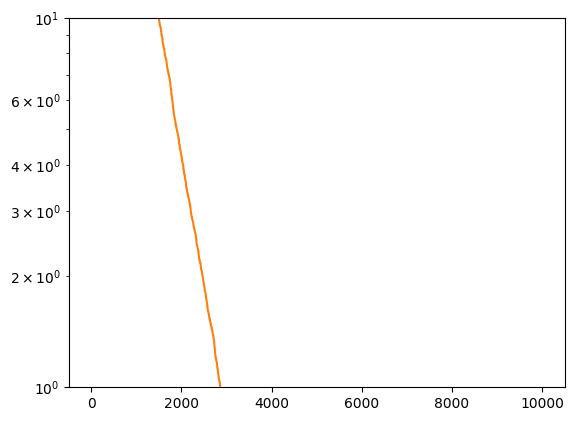

In [ ]:
#plt.semilogy(iters,errors1)
#plt.semilogy(iters,errors2)
plt.semilogy(iters,errors3)
plt.semilogy(kacz_experiment_3[1],kacz_experiment_3[2])

In [ ]:
#Theorem 2.5
phi2 = 1 - (sigmin/np.linalg.norm(A_n))**2
mean = 0
sd = 0
num = 20000

In [ ]:
def RK_ex_n(A,x,b,mu,sig,num_iter):
  m = A.shape[0]
  n = A.shape[1]
  x_k = np.zeros((n,1))
  prob = [0]*m
  error = [0]*num_iter
  for j in range(m):
    prob[j] = (np.linalg.norm(A[j])**2)/(np.linalg.norm(A)**2)
  for k in range(num_iter):
    noise = 1*np.random.normal(mu, sig, size=(m,1))
    r = np.random.choice(range(m),p=prob)
    x_k_new = x_k + ((b[r][0] + noise[r] - np.inner(x_k.T,A[r,:])[0])*A[r,:].T).reshape(n,1)
    x_k = x_k_new
    error[k] = np.linalg.norm(x_k-x)**2
  return [x_k,list(range(num_iter)),error]

In [ ]:
def error_bound_thm_2_5(A,mu,sig,num_iter):
  error = [0]*num_iter

  phi2 = 1 - (sigmin/np.linalg.norm(A))**2
  error[0] = e_0**2

  for k in range(1,num_iter):
    error[k] = (((1-phi2**(k+1))/(1-phi2))*(mu**2+sig**2))*(A.shape[0]/np.linalg.norm(A)**2) + (phi2**(k+1))*e_0**2
  return error

In [ ]:
errors_rk = error_bound_thm_2_5(A_n,mean,sd,num)
kacz_experiment_rk = RK_ex_n(A_n,x_t,b_t,mean,sd,num)

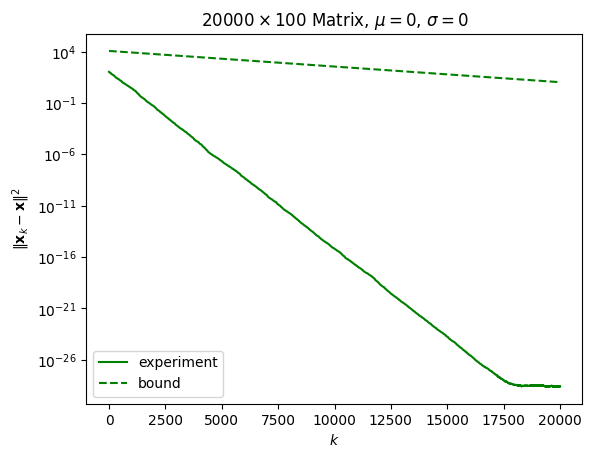

In [ ]:
fig = plt.figure()

plt.semilogy(kacz_experiment_rk[1],kacz_experiment_rk[2],'g-')
plt.semilogy(list(range(num)),errors_rk,'g--')

plt.title(r"$20000 \times 100$ Matrix, $\mu = 0$, $\sigma = 0$")
plt.xlabel('$k$')
plt.ylabel('$\|\mathbf{x}_k - \mathbf{x}\|^2$')
plt.legend(['experiment','bound'],loc="lower left")
fig.show()